## Import libs, set paths and load params

In [1]:
import os, glob
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "../src")
import auxilary_functions as f
import subprocess
import csv
import matplotlib.pyplot as plt

cfg = f.get_actual_parametrization("../src/config.json")
networks = ['gnw','networkx','fflatt', 'randg', 'dag']
networks = ['randg', 'gnw','networkx','fflatt', 'dag']
#networks = ['gnw']
organisms = ['ecoli','yeast','mouse','human']
organisms = ['ecoli']
#ffl_percentages = ['0.374', '0.270', '0.315', '0.347']
ffl_percentages = ['0.13'] #use 0.13
ffl_percentages = ['0.374']
#sizes = ['250','500','750', '999']
sizes = ['500', '750', '1000', '1500']
#sizes = ['250']
n_trials = 10

os.chdir('../networks/')
gnwdir = '/home/erik/sweden/sonnhammer/gnw/'
fflattdir = '../snippets/'

In [2]:
print(os.getcwd())
topology_dir = os.path.join(os.getcwd(), 'topology')

/home/erik/sweden/sonnhammer/GeneSnake/generation/network_generation_algo/networks


In [3]:
#collect data
connectivity_lst = []
for network in networks:
    for number, organism in enumerate(organisms):
        for size in sizes:
            current_dir = os.path.join(topology_dir, network, organism, size)
            for rep, file in enumerate(glob.glob(os.path.join(current_dir, '*sv'))):
                connectivity_lst.append(f.analyze_connectivity(file, network, rep, size))

In [11]:
connectivity_df = pd.concat(connectivity_lst)

In [12]:
connectivity_df

,frequency,average degree,Rfreq,network,size,rep
0,1.0000,0.6769,0.936292,randg,500,0
1,0.9980,0.6777,0.933781,randg,500,0
2,0.9960,0.6786,0.930957,randg,500,0
3,0.9940,0.6793,0.928760,randg,500,0
4,0.9920,0.6800,0.926563,randg,500,0
...,...,...,...,...,...,...
1495,0.0033,1.0719,-0.364767,dag,1500,9
1496,0.0027,1.0792,-0.388146,dag,1500,9
1497,0.0020,1.0911,-0.426258,dag,1500,9
1498,0.0013,1.0969,-0.444834,dag,1500,9


## Plot for E.coli

In [13]:
connectivity_df["size"] = pd.to_numeric(connectivity_df["size"])

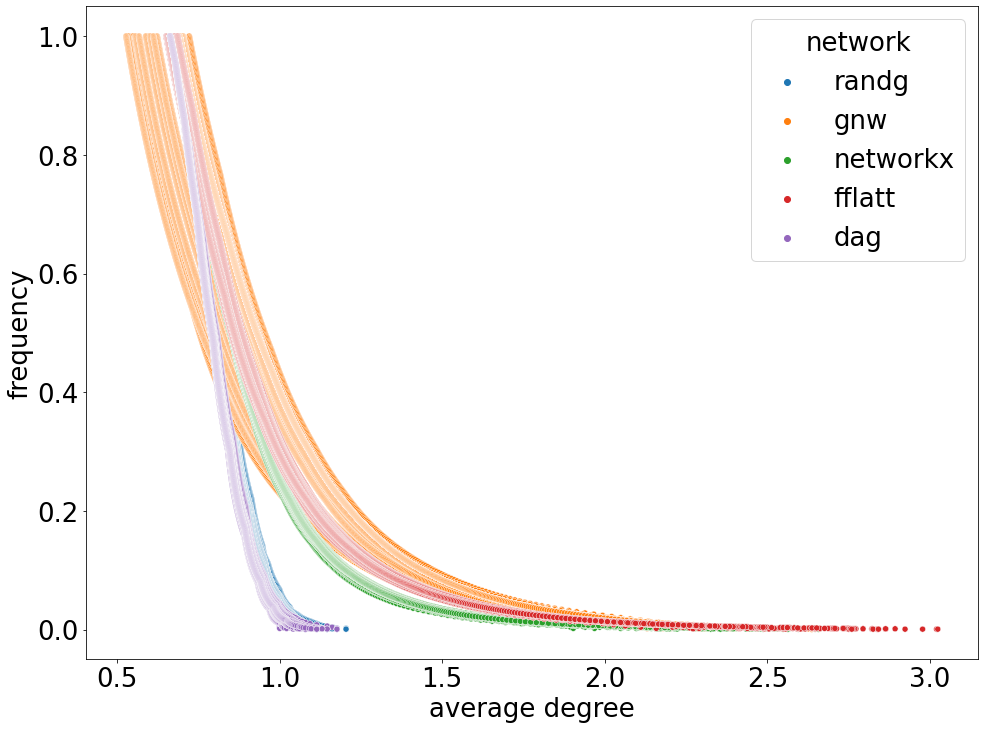

In [20]:
plt.rcParams.update({'font.size': 26})
import seaborn as sns

#connectivity_df = connectivity_df[['frequency','average degree', 'network', 'network', 'size', 'rep']]
fig, ax = plt.subplots(figsize=(16,12))
sns.scatterplot(x='average degree', y='frequency', hue='network', data=connectivity_df) 
os.chdir('../results/figures')
plt.savefig("figure5C.svg")
plt.savefig("figure5C.png")
plt.show()